In [1]:
import nn
import math
import random
import matplotlib.pyplot as plt
import numpy as np
from mnist import MNIST

In [2]:
mndata = MNIST('./mnist-example/')
mndata.gz = True

x_train, y_train = mndata.load_training()
x_test, y_test = mndata.load_testing()
x_train = nn.Tensor(x_train)
x_test = nn.Tensor(x_test)
y_train = nn.Tensor(list(y_train))
y_test = nn.Tensor(list(y_test))

# Scale down pixels from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

# OneHot label vectors
def onehot(vector):
    tmp = []
    for scalar in vector.data:
        tmp2 = [1 if i==scalar else 0 for i in range(10)]
        tmp.append(tmp2)
    return nn.Tensor(tmp)
y_train = onehot(y_train)
y_test = onehot(y_test)

print(f'x_train={x_train.shape}, y_train={y_train.shape}')
print(f'x_test={x_test.shape}, y_test={y_test.shape}')

x_train=(60000, 784), y_train=(60000, 10)
x_test=(10000, 784), y_test=(10000, 10)


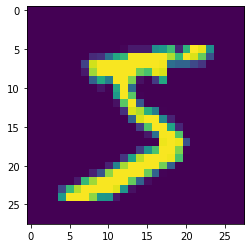

In [3]:
# Visualize X
img = np.array(x_train[0].tolist())
plt.imshow(img.reshape(28, 28))
plt.show()

In [4]:
# Init model, 200 neurons
W = nn.randn((784, 200))
act = nn.tanh
b = nn.randn((200,))
O = nn.randn((200, 10))

In [12]:
epochs = 10
for _ in range(epochs):
    batch_size = 10
    loss = nn.ones((batch_size, ))
    for batch in range(batch_size):
        i = random.randint(0, x_train.shape[0])
        ins = x_train[i]

        # Forward
        h1 = (ins@W) + b
        h1 = act(h1)
        out = h1@O
        # Softmax
        out = out.exp()
        out = out / nn.sum(out)
        # Loss
        groundtruth = y_train[i]
        maximum_likelihood = nn.sum(groundtruth*out) # .sum() funcitons as argmax
        neg_log_loss = -math.log(maximum_likelihood)
        loss[batch] = neg_log_loss

    avg_loss = nn.sum(loss) / batch_size
    print(avg_loss)
    

29.475447046662545
17.63503796547327
15.347788295112432
22.01949126805346
19.15246047842383
21.76552213292913
17.344984818722196
18.42138467221627
24.135957227318126
20.665906604772093
